<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_WOR_03_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


### About this workshop
We assume you can get started in R with ease and that you’ve done the lecture and lab for this week and all previous weeks.
- Assumed skills
  - Manipulating data objects in R
  - Executing functions in R
  - Visualising results with ggplot2
- Learning objectives
  - Understanding data related ethics
  - Identifying and understanding experimental design
  - Identifying data issues and how to fix them
  - Learning where and how to obtain online data
- Professional skills
  - Creating high quality graphics
  - Cleaning open source data
  - Merging and manipulating datasets

A reminder of expectations in the workshop:
- Keep a record of the work being completed, both the R script and this document
- Allow everyone a chance to participate in the workshop
- All opinions are valued provided they do not harm others
- Everyone is expected to help out with completing the work, learning seldom occurs by watching someone else do maths
- Shuffle the group around so that someone different is controlling R


## Set up environment


In [1]:
# Installs - only run once
install.packages("tidyverse")
install.packages("pander")
install.packages("carData")
install.packages("ggmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Imports - only run once
library(pander)
library(tidyverse)
library(carData)
library(ggmap)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


In [62]:
# global settings
options(repr.plot.width=12, repr.plot.height=6)
register_stadiamaps("0a2deae2-0bfc-43f3-aa6b-69e8e9a8a1d6", write = TRUE)

ℹ Replacing old key (0a2deae2) with new key in /root/.Renviron



# Activity 1 - Design and Ethics



Burt (1966) published a study regarding the intellegince of twins reared together and apart. Burt was a well respected educational psychologist and statistician. Unfortunately, it was later discovered that Burt’s data was manufactured.

In Burt’s “study”, he considered monozygotic twins (i.e. identical twins). He reports the IQ of the twin raised by their biological parents, the IQ of a twin raised by foster parents, and the social class of the biological parents.

The Burt data from the carData package contains Burt’s fraudulent data. Real twin datasets exist, however their access requires ethics and requests.

**Discussion**: What are research ethics? Is it right that Burt manufactured data? What should Burt have done? What ethics do you need to uphold throughout your careers? Summarise your responses below.

**Answer**: QUT’s Office of Research Ethics and Integrity (OREI) provides a good definition of research ethics and integrity (https://www.qut.edu.au/research/why-qut/ethics-and-integrity).

It is unethical for Burt to have manufactured data.

If the research was conducted today, Burt should have developed an experimental design and submitted a proposal to his institution’s ethics committee for peer review.
Following approval, Burt should have provided a participant sheet and details of ethics approval to any participants. Burt should have actually collected data from his participants, rather than fabricating the data. Burt’s data should then be made available (anonymised) so that other researchers could replicate his statistical analysis.

There are a range of ethics that should be upheld in different careers. Some include honesty, rigour, transparency, fairness, and respect.


**Exercise:** Load the `Burt` data from the `carData` package. Provide a data dictionary containing information on each of the variables.

**Answer:**

In [4]:
# Get the Burt data set and make a data dictionary for it
data(Burt)
# Create a data frame with the data dictionary in it (or just create a table in Word!)
data.frame(Name = names(Burt)) %>%
  mutate(Description = c("IQ of the child raised by the biological parents.","IQ of the child raised by the foster parents.","Socio-economic class of the twins."),
         `Type` =c("Interval","Interval","Ordinal"),
         `Typical Range` = c("60-140","60-140","Low, Medium, High"))

Name,Description,Type,Typical Range
<chr>,<chr>,<chr>,<chr>
IQbio,IQ of the child raised by the biological parents.,Interval,60-140
IQfoster,IQ of the child raised by the foster parents.,Interval,60-140
class,Socio-economic class of the twins.,Ordinal,"Low, Medium, High"


**Exercise:** Create a graphically excellent plot that shows the data in the `Burt` dataset.

**Answer:**

[1] high   high   high   high   high   high   high   medium medium medium
[11] medium medium medium low    low    low    low    low    low    low   
[21] low    low    low    low    low    low    low   
Levels: low medium high

[1] high   high   high   high   high   high   high   medium medium medium
[11] medium medium medium low    low    low    low    low    low    low   
[21] low    low    low    low    low    low    low   
Levels: low medium high

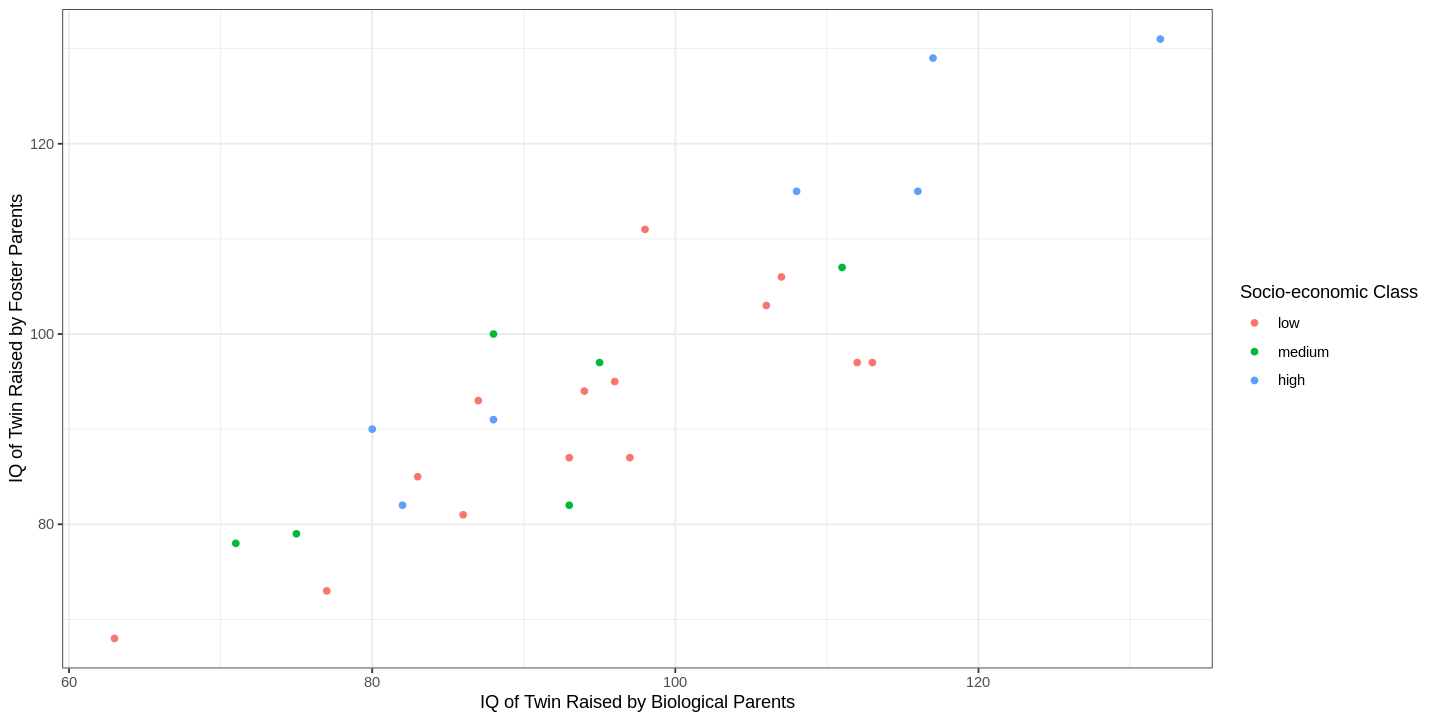

In [11]:
# Convert the "class" column to be a factor
Burt$class <- as.factor(Burt$class)
Burt$class

# Sort the levels of class into "low", "medium", "high"
Burt$class <- fct_relevel(Burt$class, "low", "medium", "high")
Burt$class

# Create a ggplot for the Burt data set
ggplot(Burt, aes(x=IQbio, y=IQfoster, color=class)) +
  geom_point() +
  theme_bw() +
  xlab("IQ of Twin Raised by Biological Parents")+
  ylab("IQ of Twin Raised by Foster Parents")+
  scale_colour_discrete(name = "Socio-economic Class")


**Exercise:** Based on the information available, describe Burt's study using the terms you learnt in the lecture (e.g. observational vs experimental, design, bias, confounding).

**Answer:** This is an observational study with a matched pairs design. The observational units are the children. There are two explanatory variables: the set of parents that raise the child, and the socio-economic status of the children.


# Activity 2 - Online Data and Data Cleaning

In this activity, you will obtain an open dataset on Vessels at Berth in Queensland. The Queensland Government and Maritime Safety Queensland keeps records of ship movements and vessels at berth in Queensland ports. This data is accessible via https://qships.tmr.qld.gov.au/webx/


**Exercise:** Go to the qships website and export the Vessels at Berth data to an Excel file. Open this Excel file, save as a CSV file, then import into R.

(If this didn't work for you on the day, download the "In Port.csv" file from Canvas).

**Exercise:** Create a data dictionary containing information on each of the variables in the dataset. Include a column to indicate the class of each variable in the data frame.

**Answer:**

In [20]:
# Get the data and check the column classes
AtBerth <- read_csv("In Port.csv")
spec(AtBerth)


Rows: 356 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Arr Date, Dep Date, Ship, Berth, Port, Agent, To

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  `Arr Date` = col_character(),
  `Dep Date` = col_character(),
  Ship = col_character(),
  Berth = col_character(),
  Port = col_character(),
  Agent = col_character(),
  To = col_character()
)

In [21]:
# Create a data frame with the data dictionary in it (or just create a table in Word!)
data.frame(Name = names(AtBerth)) %>%
  mutate(Description = c("Scheduled arrival date of the ship.","Scheduled departure date of the ship.","Ship name", "Berth name", "Port name", "Agent name", "Next ship destination"),
         `Type` =c("Interval","Interval","Nominal","Nominal", "Nominal", "Nominal","Nominal"),
         `Class` = "Character")

Name,Description,Type,Class
<chr>,<chr>,<chr>,<chr>
Arr Date,Scheduled arrival date of the ship.,Interval,Character
Dep Date,Scheduled departure date of the ship.,Interval,Character
Ship,Ship name,Nominal,Character
Berth,Berth name,Nominal,Character
Port,Port name,Nominal,Character
Agent,Agent name,Nominal,Character
To,Next ship destination,Nominal,Character


**Exercise:** How many (distinct) ships are currently at berth in Queensland ports?

**Answer:**

In [22]:
# How many (distinct) ships are currently at berth in Queensland ports?
n_distinct(AtBerth$Ship)

[1] 354

In [23]:
# How many (distinct) ships are currently at berth at each of the ports in Queensland?
AtBerth %>%
  group_by(Port) %>%
  summarise(Ships = n_distinct(Ship))

Port,Ships
<chr>,<int>
Abbot Point,5
Amrun,1
Brisbane,101
Bundaberg,5
Cairns,51
Gladstone,49
Hay Point,61
Karumba,2
Mackay,1


**Exercise:** Using the `as.Date` function, convert the arrival and departure times in your data frame to dates. Note that you will be required to specify the **current** format of your dates, for example
```
# All examples are for the 6th Feb, 2019.
as.Date(..., format = "%Y.%m.%d") #for dates such as 2019.02.06
as.Date(..., format = "%d/%m/%y") #for dates such as 06/02/19
```
Date formats are available at https://www.r-bloggers.com/date-formats-in-r/.
Note: You do not have to include information on the times.

**Answer:**

In [24]:
# Convert the date columns in place
head(AtBerth) # before
AtBerth$`Arr Date` <- as.Date(AtBerth$`Arr Date`, format = "%a %d %b %Y")
AtBerth$`Dep Date` <- as.Date(AtBerth$`Dep Date`, format = "%a %d %b %Y")
head(AtBerth) # after


Arr Date,Dep Date,Ship,Berth,Port,Agent,To
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Fri 01 Mar 2024 00:08,NA,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA
Fri 01 Mar 2024 00:08,NA,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA
Fri 01 Mar 2024 04:00,Sun 17 Mar 2024 18:30,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot Point),Abbot Point To Be Confirmed
Fri 01 Mar 2024 05:53,Mon 08 Apr 2024 12:34,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal
Fri 01 Mar 2024 15:36,Fri 15 Mar 2024 12:34,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal
Fri 01 Mar 2024 17:30,Thu 14 Mar 2024 12:34,MITOSE,East Anchorage 2,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal


Arr Date,Dep Date,Ship,Berth,Port,Agent,To
<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>
2024-03-01,NA,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA
2024-03-01,NA,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA
2024-03-01,2024-03-17,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot Point),Abbot Point To Be Confirmed
2024-03-01,2024-04-08,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal
2024-03-01,2024-03-15,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal
2024-03-01,2024-03-14,MITOSE,East Anchorage 2,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal


**Exercise:** Create a new column in the data frame that contains information on the amount of time each ship has been waiting so far.

**Answer:**

In [26]:
# Calculate the number of days each ship has been waiting
AtBerth <- mutate(AtBerth, Waiting = Sys.Date() - `Arr Date`)
head(AtBerth)

Arr Date,Dep Date,Ship,Berth,Port,Agent,To,Waiting
<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>
2024-03-01,NA,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA,13 days
2024-03-01,NA,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA,13 days
2024-03-01,2024-03-17,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot Point),Abbot Point To Be Confirmed,13 days
2024-03-01,2024-04-08,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,13 days
2024-03-01,2024-03-15,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal,13 days
2024-03-01,2024-03-14,MITOSE,East Anchorage 2,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,13 days


# Activity 3 - Data Merging and Visualisation

In this portion of the workshop, you will use the `PortInfo.csv` file from Canvas to get additional understanding of the current state of the ports.


**Exercise:** Download `PortInfo.csv` from Canvas and use `read_csv()` to read the data into `R`.

**Exercise:** Use the `View()` function to examine your data. Are there any meaningless variables or duplicate entries? Are the variables stored as appropriate classes? If these issues exist, clean up your dataset. Describe your actions in the answer section.

**Answer:**



In [29]:
# read in the data
PortInfo <- read_csv('PortInfo.csv')
PortInfo

Rows: 24 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Port Name, State/Territory, Contact, Port Type
dbl (2): Latitude, Longitude

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Port Name,State/Territory,Latitude,Longitude,Contact,Port Type
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Port Kennedy,QLD,-10.58247,142.2201,NA,PortType.EOP
Brisbane,QLD,-27.44142,153.0684,http://www.portbris.com.au,PortType.MAJOR
Cairns,QLD,-16.92891,145.7802,http://www.cairnsport.com.au,PortType.MAJOR
Bowen,QLD,-20.06667,148.3500,http://www.pcq.com.au,PortType.MINOR
Bundaberg,QLD,-24.75000,152.4000,http://www.portofbundaberg.com.au,PortType.MINOR
Gladstone,QLD,-23.83333,151.5833,http://www.gpcl.com.au,PortType.MINOR
Hay Point,QLD,-21.21667,149.3333,http://www.pcq.com.au,PortType.MINOR
Karumba,QLD,-17.46667,140.8333,http://www.pcq.com.au,PortType.MINOR
Lockhart River,QLD,-12.79523,143.3597,http://www.cairnsport.com.au,PortType.MINOR


**Exercise:** Create a data dictionary that contains the information on each of the variables in the PortInfo dataset.

**Answer:**

In [33]:
# Create a data frame with the data dictionary in it (or just create a table in Word!)
data.frame(Name = names(PortInfo)) %>%
  mutate(`Type` =c("Nominal","Nominal","Interval","Interval", "Nominal","Nominal"),
         `Class` = c("character","character","double","double", "character", "character"))

Name,Type,Class
<chr>,<chr>,<chr>
Port Name,Nominal,character
State/Territory,Nominal,character
Latitude,Interval,double
Longitude,Interval,double
Contact,Nominal,character
Port Type,Nominal,character


**Exercise:** The text in the `Port Type` column unecessarily contains "PortType." before stating port type of EOP, Minor, Major, or Resticted. Modfiy the following code to remove the term "PortType.".

```{r eval = F}
mutate(...,`Port Type` = str_replace(`Port Type`, "PortType.",...))
```

**Answer:**

In [34]:
# strip the "PortType."
PortInfo <- mutate(PortInfo, `Port Type` = str_replace(`Port Type`, "PortType.",""))
head(PortInfo)

Port Name,State/Territory,Latitude,Longitude,Contact,Port Type
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Port Kennedy,QLD,-10.58247,142.2201,NA,EOP
Brisbane,QLD,-27.44142,153.0684,http://www.portbris.com.au,MAJOR
Cairns,QLD,-16.92891,145.7802,http://www.cairnsport.com.au,MAJOR
Bowen,QLD,-20.06667,148.3500,http://www.pcq.com.au,MINOR
Bundaberg,QLD,-24.75000,152.4000,http://www.portofbundaberg.com.au,MINOR
Gladstone,QLD,-23.83333,151.5833,http://www.gpcl.com.au,MINOR


**Exercise:** Bind the columns of your "In Port" dataframe with your "Port Info" dataframe such that all entries in "In Port" remain. Include your code below. What is the key?

**Answer:**

In [35]:
# We need to do a left join - left is AtBerth and right is PortInfo
AllPort <- left_join(AtBerth, PortInfo, by = c("Port"="Port Name"))
head(AllPort)

Arr Date,Dep Date,Ship,Berth,Port,Agent,To,Waiting,State/Territory,Latitude,Longitude,Contact,Port Type
<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>,<dbl>,<dbl>,<chr>,<chr>
2024-03-01,NA,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA,13 days,QLD,-16.92891,145.7802,http://www.cairnsport.com.au,MAJOR
2024-03-01,NA,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NA,13 days,QLD,-16.92891,145.7802,http://www.cairnsport.com.au,MAJOR
2024-03-01,2024-03-17,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot Point),Abbot Point To Be Confirmed,13 days,QLD,-19.87590,148.0815,NA,MAJOR
2024-03-01,2024-04-08,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,13 days,QLD,-23.83333,151.5833,http://www.gpcl.com.au,MINOR
2024-03-01,2024-03-15,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal,13 days,QLD,-23.83333,151.5833,http://www.gpcl.com.au,MINOR
2024-03-01,2024-03-14,MITOSE,East Anchorage 2,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,13 days,QLD,-23.83333,151.5833,http://www.gpcl.com.au,MINOR


**Exercise:** With the `ggmap` library, use the following code to create a map of Queensland. Note that the zoom argument can be modified, but higher levels of zoom will take more time and memory.

**NOTE**: This code won't run on your computer, the map service now requires an API key to acess the maps. They are available free if you are interested or run the maps in this notebook.

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



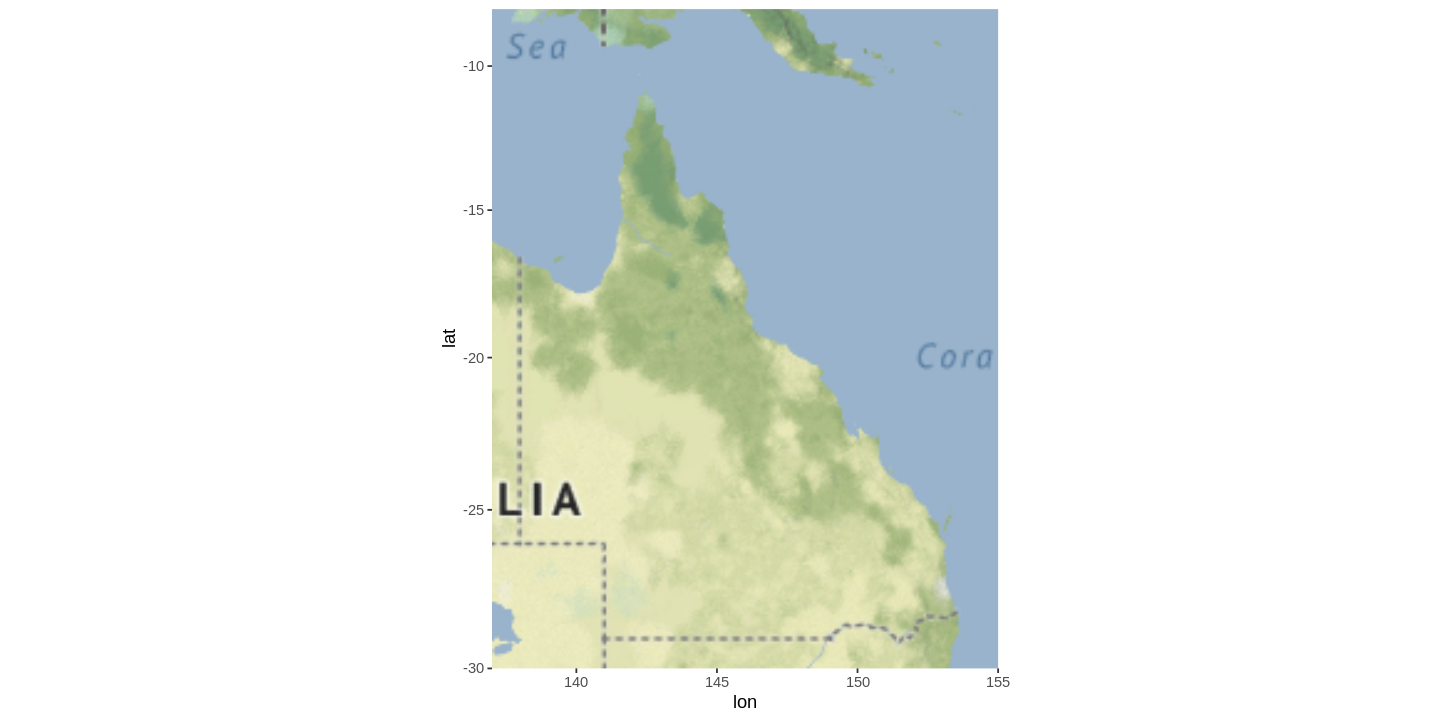

In [51]:
# New and improved stamen maps now at stadia
# (needs a free api key for authentication)
# need to set a bounding box for the map
bbox <- c(left = 137, bottom = -30, right = 155, top = -8)
# get the map from stadia
qld_map <- get_stadiamap(bbox = bbox, zoom = 4, maptype  = "stamen_terrain")
# display the map with ggmap
ggmap(qld_map)

**Exercise:** Check out some of the different maptypes, including "watercolor", "toner" and "terrain-background". Decide which background is most suitable to show the location of ships.

**Answer:**

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



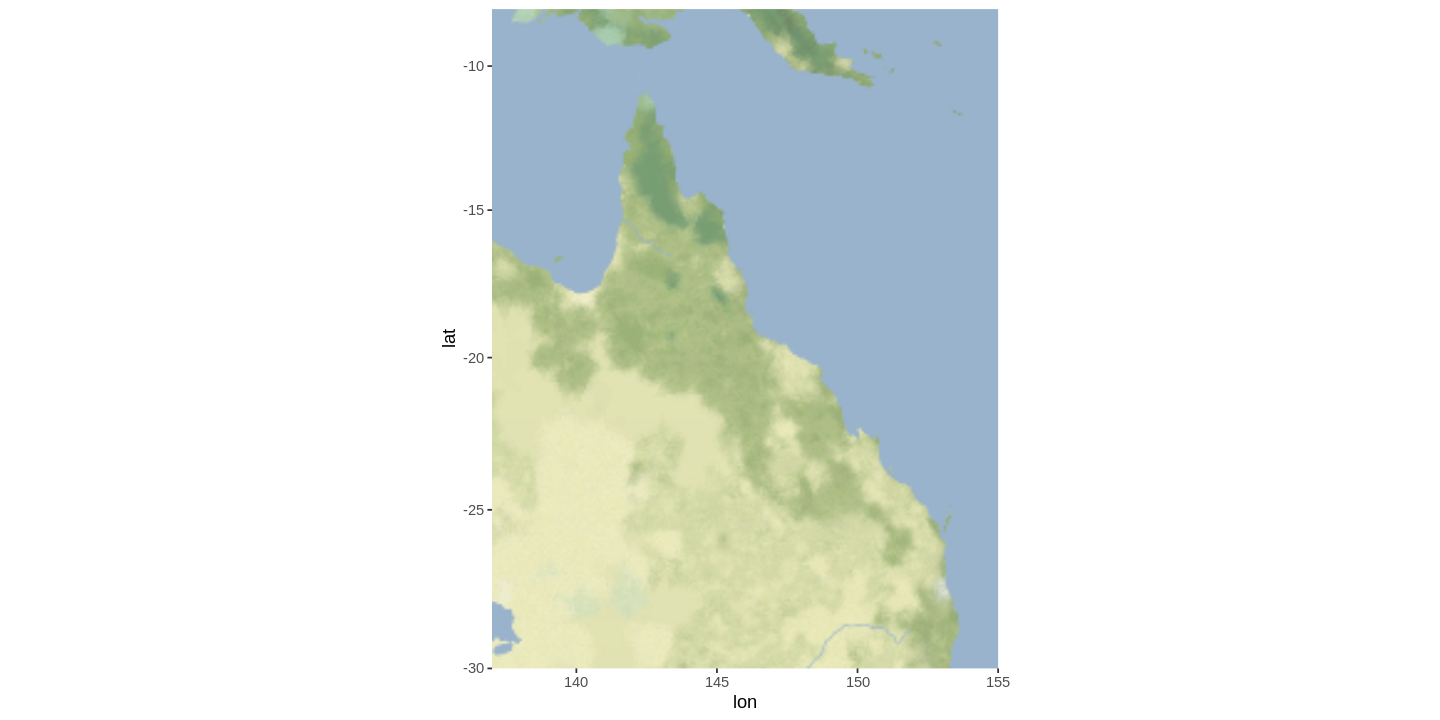

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



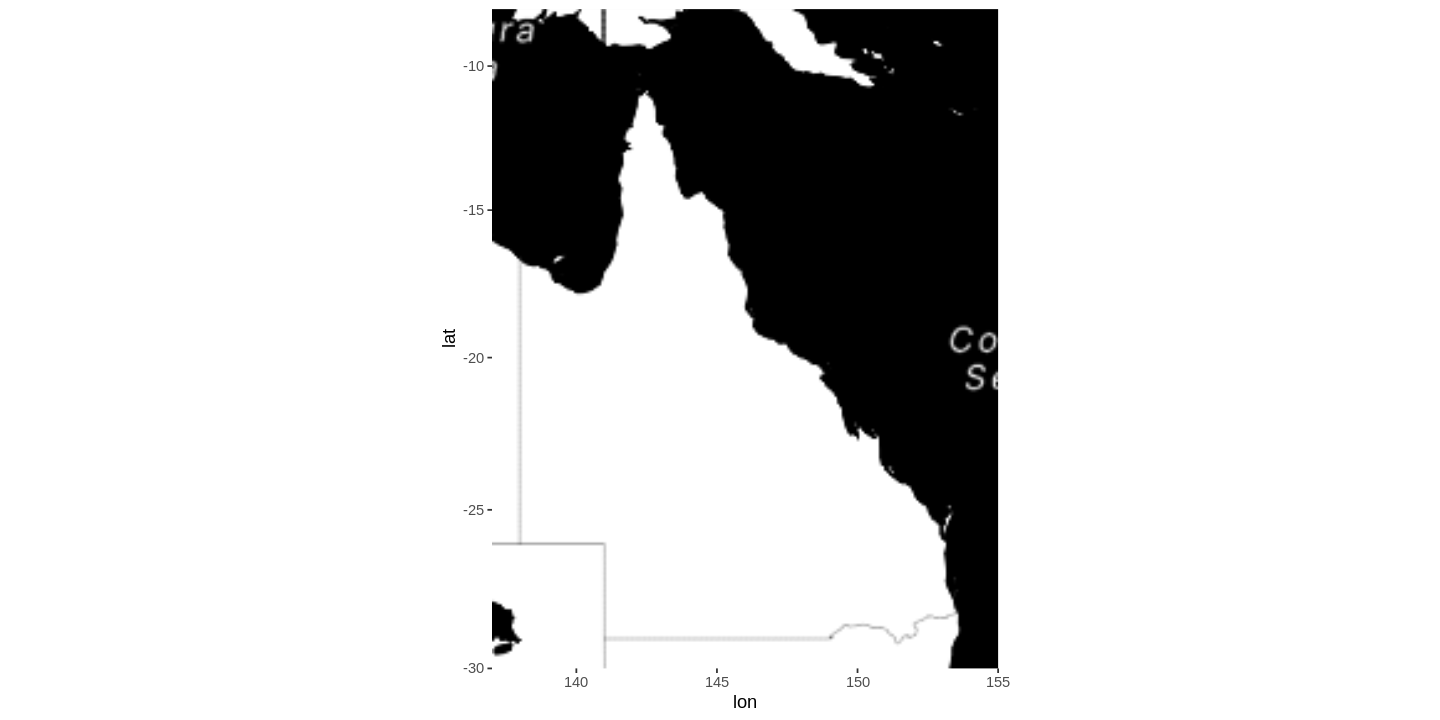

In [57]:
# compare these options with "stamen_terrain" above
ggmap(get_stadiamap(bbox = bbox, zoom = 4, maptype  = "stamen_terrain_background"))
ggmap(get_stadiamap(bbox = bbox, zoom = 4, maptype  = "stamen_toner"))

# pick "stamen_terrain_background"
qld_map <- get_stadiamap(bbox = bbox, zoom = 4, maptype  = "stamen_terrain_background")


Picking "stamen_terrain_background".

**Exercise:** Modify the following code to add port locations to the map.

```{r eval = F}
ggmap(qld_map)+
  geom_point(data = ..., aes(x = ..., y = ...))

```

**Answer:**


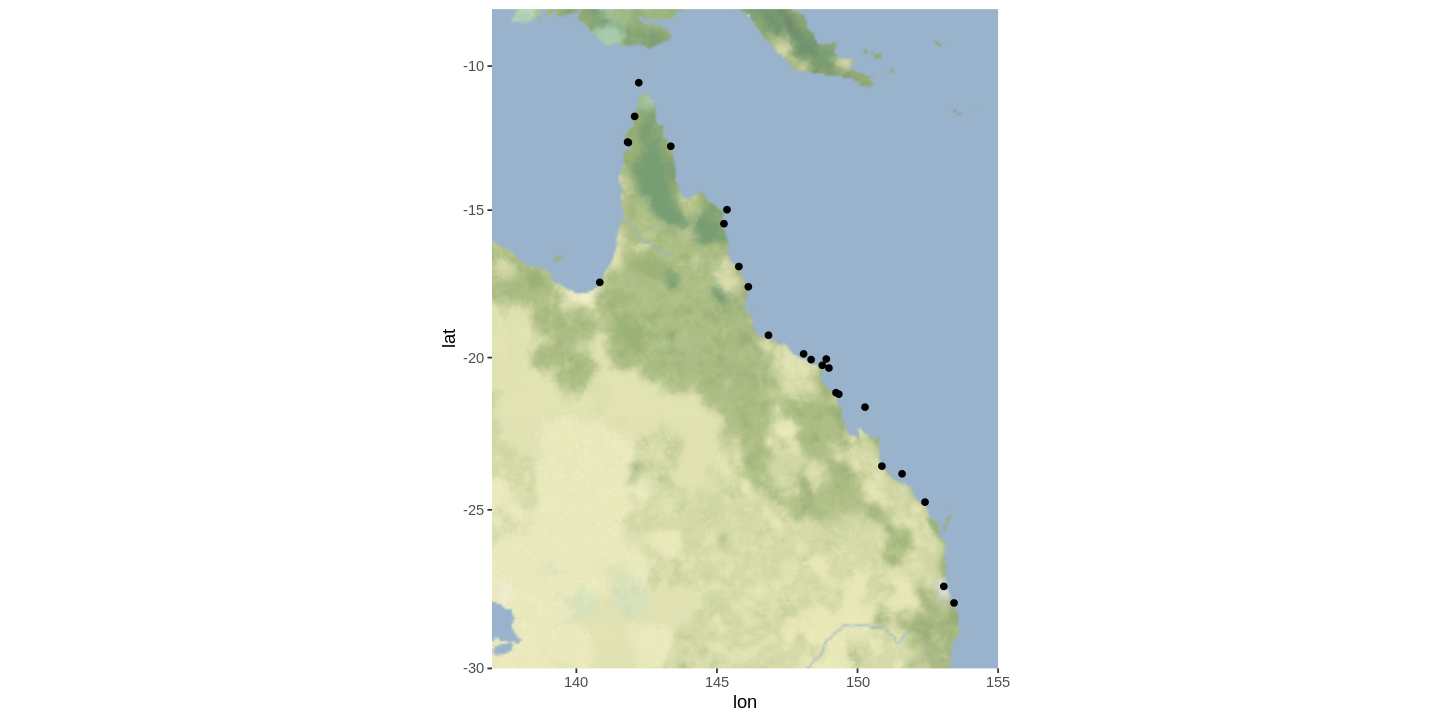

In [58]:
ggmap(qld_map)+
  geom_point(data = PortInfo, aes(x = Longitude, y = Latitude))


**Exercise:** Note that map labels can be added to the points by including `geom_text()`. Modify the below code to include port locations of only the major ports.

```{r eval = F}
ggmap(qld_map)+
  geom_point(data = ..., aes(x = ..., y = ...))+
  geom_text(data = ..., aes(x = ..., y = ..., label = ...), hjust = -0.1, size = 1)

```
**Answer:**

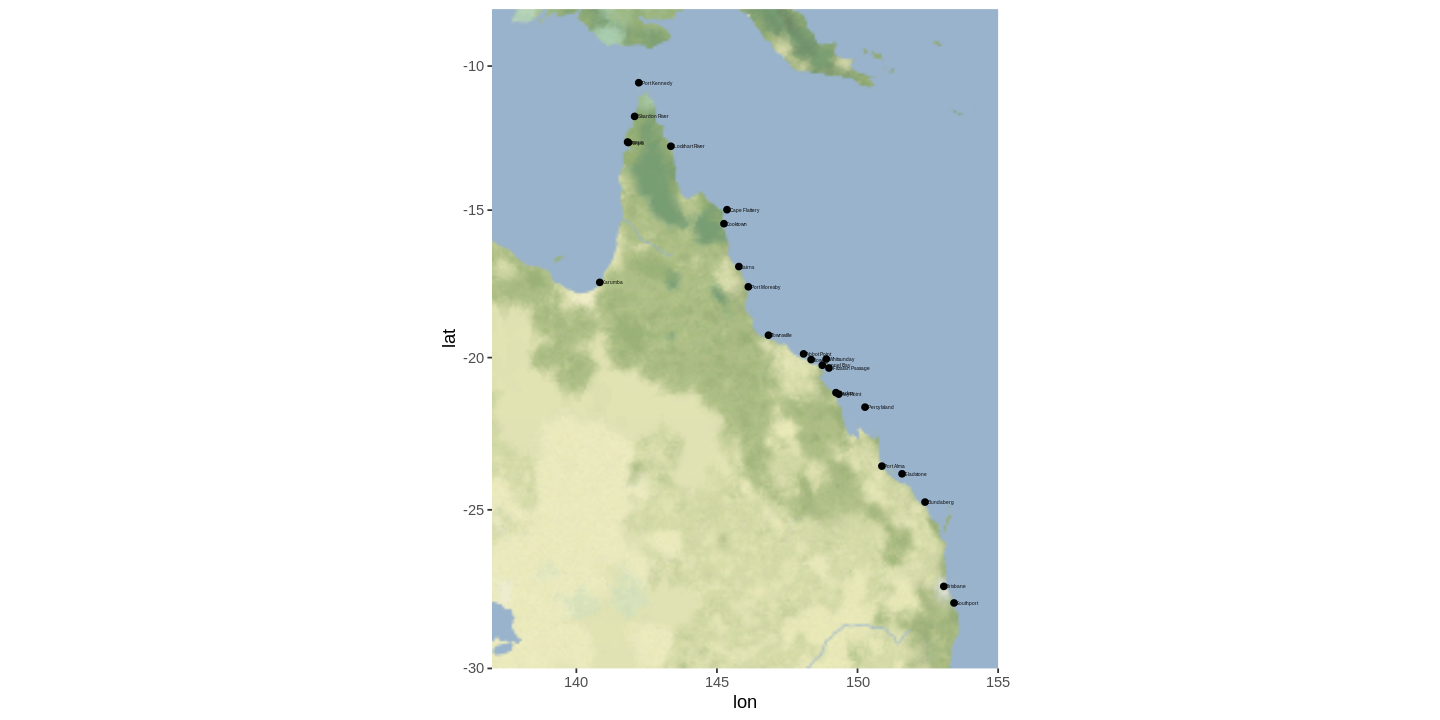

In [66]:
# Add major port labels to qld_map
ggmap(qld_map)+
  geom_point(data = PortInfo, aes(x = Longitude, y = Latitude))+
  geom_text(data = PortInfo, aes(x = Longitude, y = Latitude, label = `Port Name`), hjust = -0.1, size = 1)


**Exercise:** Modify the following code to visualise the number of ships at the ports.

```{r eval = F}
ggmap(qld_map)+
  geom_point(data = ..., aes(x = ..., y = ...))+
  geom_jitter(data = ..., aes(x = ..., y = ...), width = ..., height = ..., colour = ...)
```

**Answer:**

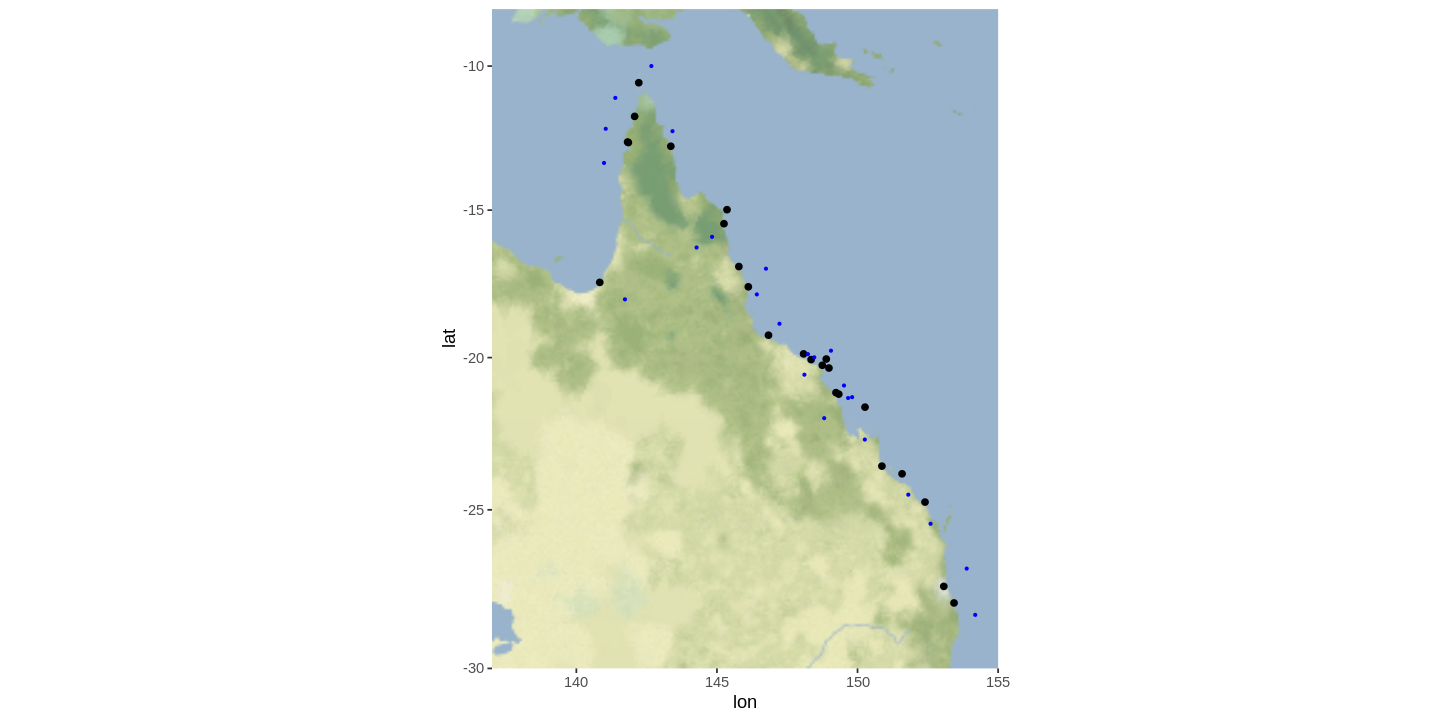

In [67]:
# Add the ships that are berthed at each port
ggmap(qld_map)+
  geom_point(data = PortInfo, aes(x = Longitude, y = Latitude))+
  geom_jitter(data = PortInfo, aes(x = Longitude, y = Latitude), width = 1, height = 1, colour = "blue", size = 0.5)
